## It's Sunday, the 12th of September, 2021. 

![Aerial photo of the Autodromo Nazionale Monza](images/autodromo-aerial-photo.jpg)

### We're at the *Autodromo Nazionale Monza* (or "Monza" for short), just north of Milan, Italy for the Formula 1 Italian Grand Prix.

It's already been an eventful weekend: 23-year-old <font color=#0600ef>**Red Bull**</font> prodigy Max Verstappen entered the paddock having taken the lead of the World Driver's Championship (WDC) standings from reigning and 7-time WDC champion and <font color=#00d2be>**Mercedes**</font> lead driver Lewis Hamilton. Verstappen did this in style, winning his home race at the Dutch Grand Prix in Zandvoort, Netherlands a week ago by over 20 seconds - an eternity in a sport usually measured in milliseconds. 

![Max Verstappen on track at the 2021 Dutch Grand Prix just after winning](images/Fans-celebrate-Max-Verstappens-Dutch-GP-win-planetF1.jpg)

Verstappen and Hamilton's championship fight will eventually go right down to the wire, being decided on the last lap of the last race of this season...

![Verstappen versus Hamilton on the last lap of Abu Dhabi 2021](images/Max-Verstappen-overtakes-Lewis-Hamilton-for-the-2021-F1-championship.jpg.webp)

...but that's a story for another time. We're here to talk about these guys.

![Ricciardo and Norris racing on space hoppers](images/lando-and-daniel.jpg)

Don't get me wrong, Daniel Ricciardo (left, 32) and Lando Norris (right, 21) are both great drivers. Daniel has 7 race wins to his name and managed to best a young Verstappen in their first 2 seasons together at Red Bull - Lando is a promising young talent with a stellar career in the junior series. But in the perpetual technological arms race that is modern Formula 1, a driver can only do what their machinery allows them to do. That's bad news for Daniel and Lando because their team, <font color=#ff8700>**McLaren**</font>, is no longer at the top of the pile. They may be the second-oldest active team and have the second-best all-time record (both after their eternal rivals <font color=#dc0000>**Ferrari**</font>), but this sport is completely devoid of sentiment and teams nearly as old and successful as McLaren have fallen into ignominy or even dissolved completely after droughts of success.

This season, McLaren's intent is to capitalize on a rare Ferrari off year and usurp their oldest rivals for 3rd place in the World Constructor's Championship (WCC). So far, it isn't going that well. After both Ferrari drivers finished well last week at Zandvoort, McLaren is trailing by 11.5 points.

In [8]:
# Let's import the libraries we'll be using:

import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import cm

import numpy as np
import pandas as pd

import requests

In [3]:
# Next, we'll enable fastf1's data cache - the library and its API calls move quite a bit of data:

ff1.Cache.enable_cache('cache') 

In [13]:
# Now we'll pull down the team (or "Constructor") standings prior to the Monza race:
# I swear this works when the site hosting it is reachable, but if it doesn't when you run this, 
# I've included a copy of the df it returns as "backupStandings.csv"

def get_constructor_standings():
    url = "https://ergast.com/api/f1/2021/13/constructorStandings.json"
    response = requests.get(url)
    data = response.json()
    drivers_standings = data['MRData']['StandingsTable']['StandingsLists'][0]['ConstructorStandings']  # noqa: E501
    return drivers_standings

constructor_standings = get_constructor_standings()

standings_df = pd.json_normalize(constructor_standings)
standings_df['points'] = standings_df['points'].astype(float)

In [12]:
rb_color = ff1.plotting.team_color('Red Bull')
mer_color = ff1.plotting.team_color('Mercedes')
fer_color = ff1.plotting.team_color('Ferrari')
mcl_color = ff1.plotting.team_color('McLaren')

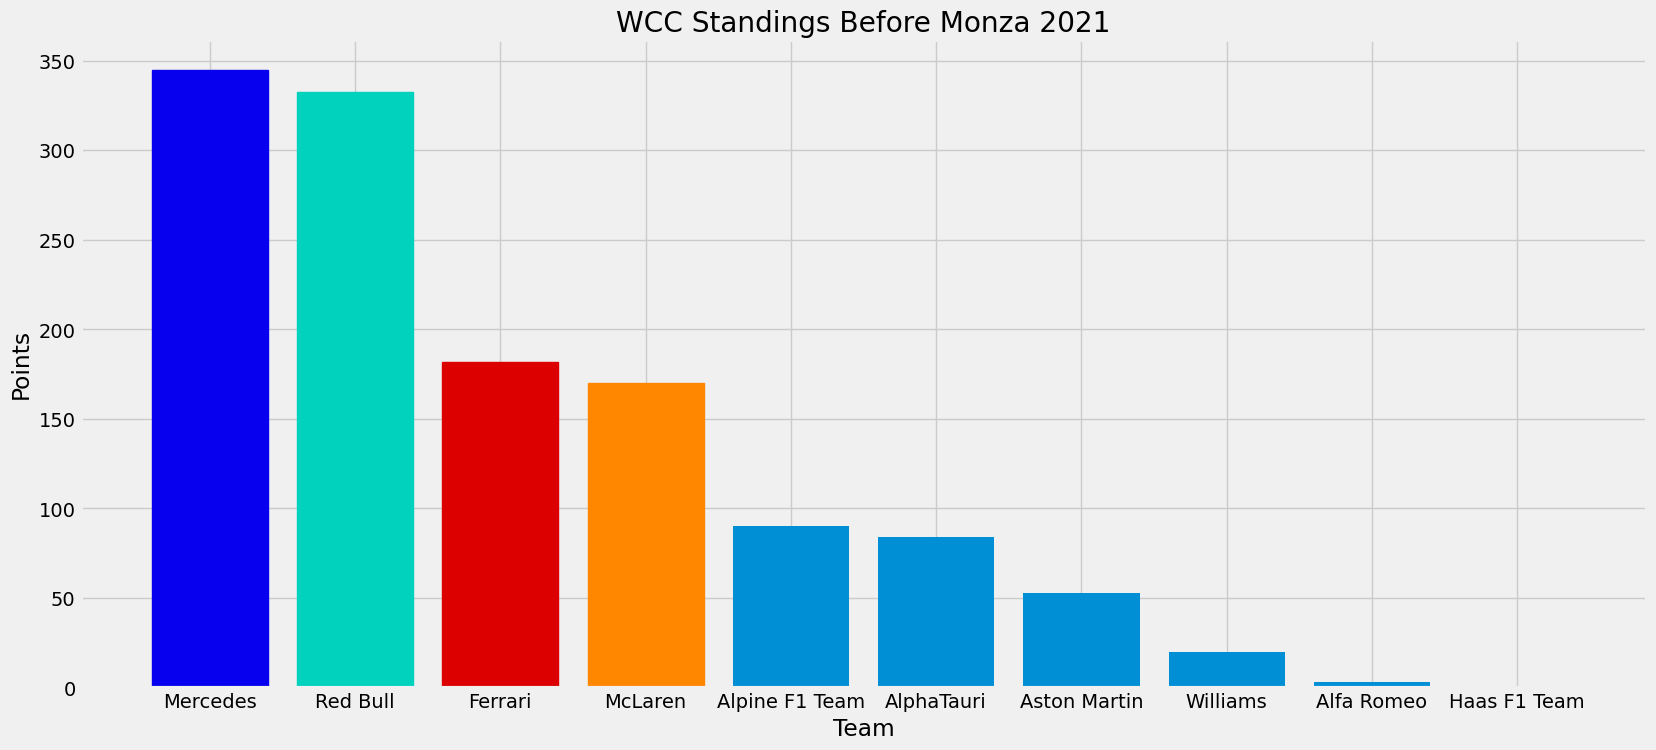

In [14]:
# fig, ax1 = plt.subplots()
# plt.rcParams['figure.figsize'] = [16, 12]
# ax1.bar(con_stan_df['Constructor.name'], con_stan_df['points'].astype(float))

plt.style.use('fivethirtyeight')
plt.figure(figsize = (18, 8))
bars = plt.bar(standings_df['Constructor.name'], standings_df['points'], linewidth = 1)
# bars = plt.bar(standings_df['Constructor.name'], standings_df['points'], linewidth = 1)
plt.xlabel('Team')
plt.ylabel('Points')
plt.title('WCC Standings Before Monza 2021')
# bars[2].set_color(fastf1.plotting.team_color(con_stan_df['Constructor.name'].iloc[2]))
bars[0].set_color(mer_color)
bars[1].set_color(rb_color)
bars[2].set_color(fer_color)
bars[3].set_color(mcl_color)

In [33]:
year, grand_prix, session = 2021, 'Monza', 'R'

race = ff1.get_session(year, grand_prix, session)
race.load()

core           INFO 	Loading data for Italian Grand Prix - Race [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '4', '77', '16', '11', '55', '18', '14', '63', '31', '6', '5', '99', '88', '47', '9', '44', '33', '10', '22']


#### Specify the drivers we care about: Ricciardo, Norris, Hamilton, and Verstappen

In [34]:
driver_1, driver_2, driver_3, driver_4 = 'RIC', 'NOR', 'HAM', 'VER'

#### Next, we need to convert our drivers' laptimes from the `timedelta` datatype into floats so that we can chart them. We'll also trim the in- and out-laps from our dataframe as they skew the overall pace.

In [40]:
race.laps['LapTimeSeconds'] = race.laps['LapTime'].dt.total_seconds()

laps = race.laps.loc[(race.laps['PitOutTime'].isnull() & race.laps['PitInTime'].isnull())]

In [36]:
race.laps.head()

,Time,DriverNumber,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,TyreLife,FreshTyre,Stint,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate,LapTimeSeconds
0,0 days 01:03:52.443000,3,NaT,1.0,0 days 00:25:09.902000,NaT,NaT,0 days 00:00:29.470000,0 days 00:00:38.561000,NaT,...,1.0,True,1,0 days 01:02:14.632000,McLaren,RIC,26,False,2021-09-12 13:03:16.241,NaN
1,0 days 01:05:23.188000,3,0 days 00:01:30.745000,2.0,NaT,NaT,0 days 00:00:32.860000,0 days 00:00:29.263000,0 days 00:00:28.622000,0 days 01:04:25.303000,...,2.0,True,1,0 days 01:03:52.443000,McLaren,RIC,67,False,2021-09-12 13:04:54.052,90.745
2,0 days 01:06:49.514000,3,0 days 00:01:26.326000,3.0,NaT,NaT,0 days 00:00:28.357000,0 days 00:00:29.409000,0 days 00:00:28.560000,0 days 01:05:51.545000,...,3.0,True,1,0 days 01:05:23.188000,McLaren,RIC,1,True,2021-09-12 13:06:24.797,86.326
3,0 days 01:08:15.827000,3,0 days 00:01:26.313000,4.0,NaT,NaT,0 days 00:00:28.325000,0 days 00:00:29.399000,0 days 00:00:28.589000,0 days 01:07:17.839000,...,4.0,True,1,0 days 01:06:49.514000,McLaren,RIC,1,True,2021-09-12 13:07:51.123,86.313
4,0 days 01:09:42.237000,3,0 days 00:01:26.410000,5.0,NaT,NaT,0 days 00:00:28.499000,0 days 00:00:29.329000,0 days 00:00:28.582000,0 days 01:08:44.326000,...,5.0,True,1,0 days 01:08:15.827000,McLaren,RIC,1,True,2021-09-12 13:09:17.436,86.410


In [37]:
laps_driver_1 = race.laps.pick_driver(driver_1)
laps_driver_2 = race.laps.pick_driver(driver_2)
laps_driver_3 = race.laps.pick_driver(driver_3)
laps_driver_4 = race.laps.pick_driver(driver_4)

drivers_to_visualize = ['RIC', 'NOR', 'HAM', 'VER']
visualized_teams = []

In [53]:
# Trying to programatically extract safety car laps to highlight x ranges with non-representative laptimes
# sc_laps = laps_driver_1.loc[laps_driver_1['TrackStatus']] == '4'
# sc_laps_1 = laps_driver_1.pick_track_status('4', how="contains")
# sc_laps_2 = laps_driver_1.pick_track_status('6', how='contains')

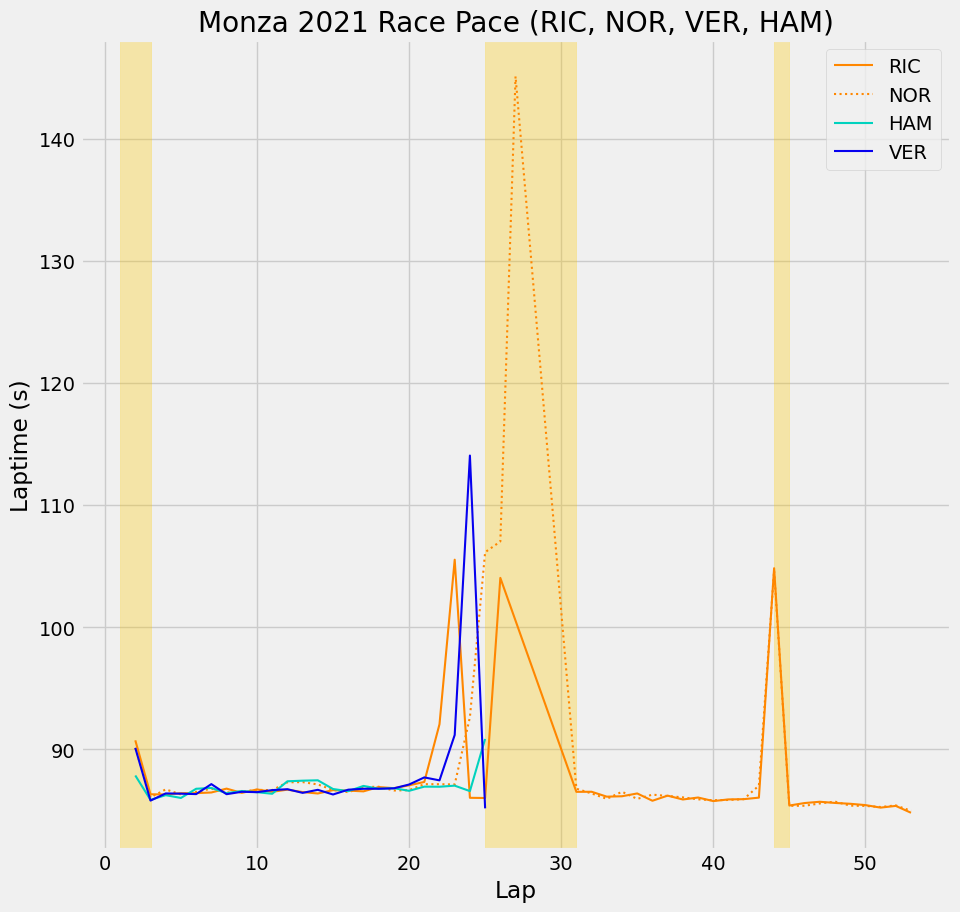

In [56]:
# To make sure we won't get any equally styled lines when comparing teammates
visualized_teams = []

# Make plot a bit bigger
plt.rcParams['figure.figsize'] = [10, 10]

# Create 2 subplots (1 for the boxplot, 1 for the lap-by-lap comparison)
fig, ax = plt.subplots()

for driver in drivers_to_visualize:
    driver_laps = race.laps.pick_driver(driver)[['LapNumber', 'LapTimeSeconds', 'Team']]
    
    # Select all the laps from that driver
    driver_laps = driver_laps.dropna()
    
    # Get their team for coloring purploses
    team = pd.unique(driver_laps['Team'])[0]
    
    x = driver_laps['LapNumber']
    
    # Create a smoothed line between all the laptimes
    # poly = np.polyfit(driver_laps['LapNumber'], driver_laps['LapTimeSeconds'], 5)
    # y_poly = np.poly1d(poly)(driver_laps['LapNumber'])

    # Create a rolling average of laptimes
    # y = driver_laps['LapTimeSeconds'].rolling(3, center=True).mean()
    y = driver_laps['LapTimeSeconds']
    
    # Make sure that two teammates don't get the same line style
    linestyle = '-' if team not in visualized_teams else ':'
    
    # Plot the data
    ax.plot(x, y, label=driver, color=ff1.plotting.team_color(team), linestyle=linestyle, linewidth=1.5)
    
    # Append labels
    ax.set(ylabel = 'Laptime (s)')
    ax.set(xlabel = 'Lap')
    
    # Set title
    ax.set_title('Monza 2021 Race Pace (RIC, NOR, VER, HAM)')

    # Generate legend
    ax.legend()
    
    # Add the team to the visualized teams variable so that the next time the linestyle will be different
    visualized_teams.append(team)

sc_yellow = '#ffca00'

# Highlight Safety Car & Virtual Safety Car laps in F1's Safety Car Yellow
# Could definitely do this programatically. Outer values of consecutive runs? axvspan method can only take beginning and ending lap numbers
ax.axvspan(1, 3, color=sc_yellow, alpha=0.3)
ax.axvspan(25, 31, color=sc_yellow, alpha=0.3)
ax.axvspan(44, 45, color=sc_yellow, alpha=0.3)
